<a href="https://colab.research.google.com/github/flavio641/Modelos_Aprendizados_Maquinas/blob/main/Regress%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.9 MB/s 
     |████████████████████████████████| 662 kB 43.9 MB/s 
     |████████████████████████████████| 167 kB 14.1 MB/s 
     |████████████████████████████████| 2.0 MB 38.9 MB/s 
     |████████████████████████████████| 6.8 MB 55.4 MB/s 
     |████████████████████████████████| 1.7 MB 53.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 147 kB 73.2 MB/s 
     |████████████████████████████████| 25.8 MB 1.5 MB/s 
     |████████████████████████████████| 328 kB 79.9 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 5.0 MB 58.8 MB/s 
     |████████████████████████████████| 16.7 MB 59.3 MB/s 
     |████████████████████████████████

In [6]:
from pycaret.datasets import get_data

In [7]:
dados = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


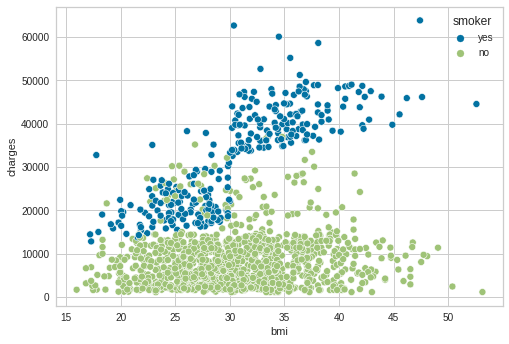

In [8]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue= 'smoker', data= dados)

# ***Objetivo : construir um modelo para previsão dos custos médicos de uma pessoa***

In [9]:
# funções que iremos utilizar do PyCaret
from pycaret.regression import setup, models, create_model, tune_model, \
                               compare_models, blend_models, stack_models, \
                               predict_model, evaluate_model, \
                               finalize_model, save_model, load_model

In [10]:
# configuração da regressão
regressao = setup(data = dados, target = 'charges', normalize = True)

,Description,Value
0,session_id,6696
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='charges')),
    

In [11]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [12]:
# Criando um Modelo
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2658.6011,2.074149e+07,4554.2826,0.8562,0.4651,0.2928
1,3018.8702,2.663292e+07,5160.7092,0.7641,0.5531,0.4188
2,3247.3025,3.348952e+07,5787.0126,0.7907,0.5035,0.3992
3,2794.5583,2.403890e+07,4902.9479,0.7795,0.5194,0.4043
4,3519.2077,3.760371e+07,6132.1868,0.7387,0.5754,0.2780
5,2426.1568,1.623387e+07,4029.1277,0.9055,0.4600,0.3711
6,2925.3847,2.828883e+07,5318.7246,0.8244,0.5332,0.3299
7,2387.5067,1.617269e+07,4021.5287,0.8847,0.4043,0.3305
8,2997.8621,2.681183e+07,5178.0139,0.8362,0.4585,0.3778


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=6696, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [13]:
rf_tunado = tune_model(rf, optimize = 'RMSLE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2428.6966,1.763709e+07,4199.6532,0.8777,0.4310,0.2714
1,2665.7220,2.292529e+07,4788.0357,0.7969,0.4883,0.3442
2,3155.1178,3.276958e+07,5724.4722,0.7952,0.4703,0.3556
3,2650.8862,2.121320e+07,4605.7790,0.8054,0.4696,0.3671
4,3503.6221,3.618922e+07,6015.7475,0.7485,0.5559,0.2936
5,2403.7886,1.407143e+07,3751.1901,0.9181,0.4363,0.3453
6,2830.7107,2.745115e+07,5239.3847,0.8296,0.5210,0.3158
7,2224.1323,1.277859e+07,3574.7159,0.9089,0.3816,0.3215
8,2877.8188,2.514757e+07,5014.7357,0.8463,0.4368,0.3549


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.001,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=270, n_jobs=-1, oob_score=False,
                      random_state=6696, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [14]:
# Comparando os modelos implementados, ordenando pelo RMSLE
melhores = compare_models(sort = 'RMSLE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2665.4686,2.270022e+07,4692.4631,0.8404,0.4394,0.3125,0.088
huber,Huber Regressor,3498.1371,4.948629e+07,6956.1201,0.6456,0.4576,0.2172,0.041
par,Passive Aggressive Regressor,3811.2785,5.447153e+07,7338.8702,0.6222,0.4599,0.1945,0.045
rf,Random Forest Regressor,2821.3471,2.477636e+07,4929.7586,0.8254,0.4811,0.3461,0.324
et,Extra Trees Regressor,2890.5553,3.009735e+07,5423.9616,0.7882,0.4971,0.3357,0.278
llar,Lasso Least Angle Regression,4314.4610,3.768440e+07,6107.8401,0.7353,0.5507,0.4468,0.014
ridge,Ridge Regression,4332.0505,3.773921e+07,6112.4070,0.7350,0.5530,0.4496,0.011
br,Bayesian Ridge,4329.7496,3.774409e+07,6112.7129,0.7350,0.5542,0.4491,0.013
lasso,Lasso Regression,4320.6572,3.774116e+07,6112.1048,0.7349,0.5583,0.4471,0.014
lr,Linear Regression,4321.4111,3.774486e+07,6112.3866,0.7348,0.5594,0.4472,0.012


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6696, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                        

In [15]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2654.7809,1.919850e+07,4381.6094,0.8669,0.4312,0.2872
1,2559.9658,2.244258e+07,4737.3597,0.8012,0.4677,0.3127
2,3097.4681,3.252280e+07,5702.8760,0.7968,0.4493,0.3170
3,2817.6059,2.220422e+07,4712.1351,0.7963,0.4935,0.3982
4,3704.6095,3.921877e+07,6262.4892,0.7274,0.5520,0.3224
5,2238.1991,1.400654e+07,3742.5319,0.9185,0.4091,0.2986
6,2656.1593,2.614684e+07,5113.3985,0.8377,0.4860,0.3046
7,1923.4752,1.161122e+07,3407.5247,0.9173,0.3589,0.2727
8,2687.1819,2.358232e+07,4856.1628,0.8559,0.4195,0.3365


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6696, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [16]:
gbr_tunado = tune_model(gbr, optimize = 'RMSLE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3113.6210,2.364072e+07,4862.1727,0.8361,0.4842,0.3330
1,3178.7712,2.687291e+07,5183.9084,0.7619,0.5756,0.4171
2,3516.0566,3.298731e+07,5743.4577,0.7939,0.4847,0.3932
3,3008.1541,2.432641e+07,4932.1813,0.7769,0.5494,0.4163
4,3749.2087,3.924193e+07,6264.3380,0.7273,0.6268,0.3189
5,2631.3508,1.726682e+07,4155.3363,0.8995,0.5783,0.4214
6,3225.6220,3.221014e+07,5675.3976,0.8001,0.5604,0.3814
7,2764.8945,1.545597e+07,3931.4076,0.8899,0.4224,0.3934
8,2846.1680,2.285972e+07,4781.1841,0.8603,0.4241,0.3547


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 6
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6696, subsample=0.65, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [17]:
modelo_combinado = blend_models(melhores)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2960.8325,2.318435e+07,4815.0135,0.8393,0.4310,0.2337
1,2785.6969,2.422246e+07,4921.6314,0.7854,0.4635,0.2763
2,3420.1685,3.636305e+07,6030.1786,0.7728,0.4335,0.2909
3,3014.8651,2.704256e+07,5200.2458,0.7520,0.4505,0.2836
4,3807.1551,4.303165e+07,6559.8512,0.7009,0.5685,0.2496
5,2310.7764,1.659144e+07,4073.2590,0.9034,0.3584,0.2344
6,2813.1700,2.990918e+07,5468.9289,0.8144,0.5002,0.2465
7,2143.0913,1.387159e+07,3724.4587,0.9011,0.3235,0.2119
8,2733.6459,2.594781e+07,5093.8993,0.8414,0.3524,0.2270


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 7
INFO:logs:VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
     

In [18]:
modelo_stack = stack_models(melhores)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2687.6180,1.993021e+07,4464.3268,0.8619,0.4395,0.2709
1,2670.0138,2.298796e+07,4794.5765,0.7964,0.5148,0.3254
2,3052.5823,3.244437e+07,5695.9955,0.7973,0.4512,0.3073
3,2937.6935,2.231362e+07,4723.7295,0.7953,0.4798,0.3587
4,3626.9345,3.935653e+07,6273.4782,0.7265,0.5654,0.2956
5,2304.3776,1.394219e+07,3733.9238,0.9188,0.4300,0.3132
6,2615.5548,2.571843e+07,5071.3339,0.8404,0.4821,0.2804
7,2066.7089,1.216439e+07,3487.7486,0.9133,0.7069,0.2808
8,2664.5135,2.296707e+07,4792.3975,0.8597,0.4065,0.3199


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 8
INFO:logs:StackingRegressor(cv=5,
                  estimators=[('gbr',
                               GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                       

In [19]:
# Performance nos dados de validacao
pred = predict_model(rf_tunado)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.001,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=270, n_jobs=-1, oob_score=False,
                      random_state=6696, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2517.4086,1.903528e+07,4362.9445,0.8724,0.4069,0.3051


In [20]:
pred

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,-1.423410,-0.905079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1632.036255,1957.751046
1,1.030867,1.508384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10579.710938,13325.476154
2,-0.629379,-0.316980,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20745.988281,19941.250787
3,1.463975,-0.479272,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,14001.133789,13523.565611
4,0.236837,-0.666661,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21348.705078,27448.137317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.752714,1.796996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,15555.188477,17374.455266
398,0.597760,0.236820,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8551.346680,10362.338567
399,0.092467,0.589010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6600.206055,8164.702975
400,-0.845933,0.919450,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37133.898438,38894.490454


In [21]:
# Utilizando o modelo escolhido nos dados todos para gerar o modelo final
modelo_final = finalize_model(rf_tunado)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.001,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=270, n_jobs=-1, oob_score=False,
                      random_state=6696, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.001,
                      min_impurity_split=None, min_samples_leaf=2,
                

In [22]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-charges')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.001,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=270, n_jobs=-1, oob_score=False,
                      random_state=6696, verbose=0, warm_start=False), model_name=meu-melhor-modelo-para-charges, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_f

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=7,
                                        max_features=1.0, max_leaf_nodes=None,
                                        max_samples=None,
                                   

In [23]:
import pandas as pd
modelo = load_model('meu-melhor-modelo-para-charges')

def CustoSeguro(age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    dados = pd.DataFrame(dados0)

    pred = float(predict_model(modelo, data = dados)['Label'].round(2))  

    print('Custo do Seguro: ${}'.format(pred)) 

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=meu-melhor-modelo-para-charges, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [27]:
CustoSeguro(age = 31, 
            sex = 'male', 
            bmi = 25, 
            children = 0, 
            smoker =  'no', 
            region = 'southwest')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=7,
                                       max_features=1.0, max_leaf_nodes=None,
                                   

Custo do Seguro: $4091.82


In [28]:
CustoSeguro(40, 'female', 30, 2, 'yes', 'southwest')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=7,
                                       max_features=1.0, max_leaf_nodes=None,
                                   

Custo do Seguro: $24900.72
